# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Config info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [2]:
print(query_url)


http://api.openweathermap.org/data/2.5/weather?appid=b62fad0a26da7e8772264ef3cb68b5a0&units=imperial&q=


## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

x=0
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        x=x+1
        print(f"Pulling data for {x} | {city}")
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
    except KeyError: 
        print("data not found")

Pulling data for 1 | hermanus
Pulling data for 2 | busselton
Pulling data for 3 | bluff
Pulling data for 4 | vaini
Pulling data for 5 | taolanaro
data not found
Pulling data for 6 | kapaa
Pulling data for 7 | kirkwall
Pulling data for 8 | faanui
Pulling data for 9 | provideniya
Pulling data for 10 | pevek
Pulling data for 11 | vestmanna
Pulling data for 12 | rikitea
Pulling data for 13 | payo
Pulling data for 14 | ushuaia
Pulling data for 15 | katherine
Pulling data for 16 | haines junction
Pulling data for 17 | nanortalik
Pulling data for 18 | yining
Pulling data for 19 | barentsburg
data not found
Pulling data for 20 | longyearbyen
Pulling data for 21 | ponta do sol
Pulling data for 22 | punta arenas
Pulling data for 23 | caravelas
Pulling data for 24 | byron bay
Pulling data for 25 | sant feliu de guixols
Pulling data for 26 | cape town
Pulling data for 27 | saint-philippe
Pulling data for 28 | albany
Pulling data for 29 | khatanga
Pulling data for 30 | coquimbo
Pulling data for 31 

Pulling data for 248 | chikwawa
Pulling data for 249 | bhind
Pulling data for 250 | comodoro rivadavia
Pulling data for 251 | suba
Pulling data for 252 | georgetown
Pulling data for 253 | saldanha
Pulling data for 254 | lagoa
Pulling data for 255 | young
Pulling data for 256 | monte azul
Pulling data for 257 | aden
Pulling data for 258 | edmond
Pulling data for 259 | eureka
Pulling data for 260 | tacuarembo
Pulling data for 261 | urumqi
Pulling data for 262 | yellowknife
Pulling data for 263 | high level
Pulling data for 264 | bathsheba
Pulling data for 265 | cherskiy
Pulling data for 266 | khandbari
Pulling data for 267 | tumannyy
data not found
Pulling data for 268 | camapua
Pulling data for 269 | aketi
Pulling data for 270 | castro
Pulling data for 271 | sola
Pulling data for 272 | port alfred
Pulling data for 273 | north bend
Pulling data for 274 | tacna
Pulling data for 275 | havre-saint-pierre
Pulling data for 276 | ust-ishim
Pulling data for 277 | mys shmidta
data not found
Pull

Pulling data for 494 | paveh
Pulling data for 495 | polunochnoye
Pulling data for 496 | fuerte olimpo
Pulling data for 497 | dubbo
Pulling data for 498 | menongue
Pulling data for 499 | yarada
Pulling data for 500 | tezu
Pulling data for 501 | uzumlu
data not found
Pulling data for 502 | pacifica
Pulling data for 503 | eyrarbakki
Pulling data for 504 | codajas
Pulling data for 505 | nantucket
Pulling data for 506 | balabac
Pulling data for 507 | oranjestad
Pulling data for 508 | hualmay
Pulling data for 509 | atbasar
Pulling data for 510 | agva
data not found
Pulling data for 511 | boa vista
Pulling data for 512 | tupanatinga
Pulling data for 513 | honiara
Pulling data for 514 | azimur
data not found
Pulling data for 515 | grenfell
Pulling data for 516 | tacoronte
Pulling data for 517 | wilmington
Pulling data for 518 | guisa
Pulling data for 519 | palafrugell
Pulling data for 520 | rayachoti
Pulling data for 521 | iturama
Pulling data for 522 | tarpon springs
Pulling data for 523 | am

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
#Create the data frame 
export_frame = pd.DataFrame({
        "City":city_name,
        "Lat":lat,
        "Lng":lng,
        "Max Temp":max_temp,
        "Humidity":humidity,
        "Cloudiness":cloudiness,
        "Wind Speed":wind_speed,
        "Country":country,
        "Date":date 
})
#Export the data to a .csv file 
export_frame.to_csv("city_weather.csv", index = False)
#Display the data frame
export_frame

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,61.00,87,99,3.00,ZA,1603672968
1,Busselton,-33.65,115.33,75.00,46,0,12.46,AU,1603672968
2,Bluff,-46.60,168.33,54.00,59,73,8.01,NZ,1603672494
3,Vaini,-21.20,-175.20,73.40,94,90,13.87,TO,1603672471
4,Kapaa,22.08,-159.32,82.99,74,40,9.17,US,1603672489
...,...,...,...,...,...,...,...,...,...
573,Surgut,61.25,73.42,26.60,100,90,11.18,RU,1603673059
574,Mugan,35.94,101.38,39.61,65,87,6.06,CN,1603673059
575,Kurchum,48.57,83.65,35.38,72,97,9.10,KZ,1603673059
576,Maniitsoq,65.42,-52.90,28.13,79,100,8.28,GL,1603673059


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#no cities with humidity over 100%

In [13]:
#  Get the indices of cities that have humidity over 100%
df2 = export_frame.loc[export_frame["Humidity"] >= 100]
df2

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
75,Ketchikan,55.34,-131.65,37.40,100,90,28.86,US,1603672726
119,Norman Wells,65.28,-126.83,30.20,100,90,9.17,CA,1603672527
134,Mar del Plata,-38.00,-57.56,60.80,100,90,5.99,AR,1603672754
195,Comitancillo,15.08,-91.72,66.99,100,100,2.46,GT,1603673002
304,Barsovo,61.17,73.17,26.60,100,90,11.18,RU,1603673018
310,Folkestone,51.08,1.18,51.01,100,38,1.99,GB,1603673019
328,Karlskrona,56.16,15.59,53.60,100,100,8.05,SE,1603673022
333,Vondrozo,-22.82,47.28,59.61,100,77,2.21,MG,1603673022
338,Parczew,51.64,22.90,51.80,100,90,6.93,PL,1603673023
407,Novi Sad,45.25,19.84,50.00,100,0,4.18,RS,1603673034


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

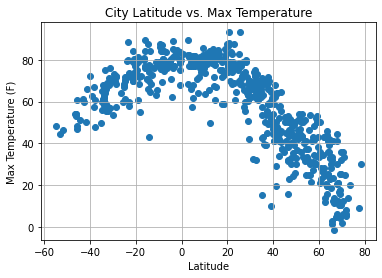

In [14]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Max Temp"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Humidity Plot

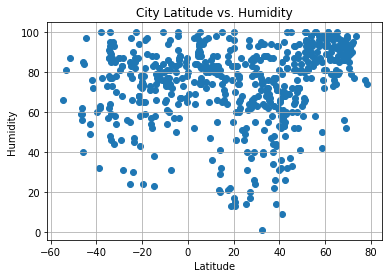

In [15]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Humidity"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Cloudiness Plot

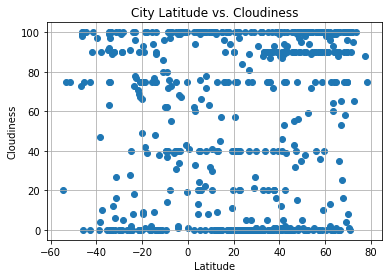

In [16]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Cloudiness"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

## Latitude vs. Wind Speed Plot

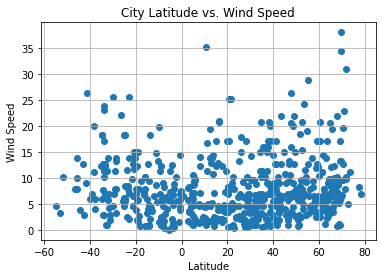

In [17]:
#Create the plot
plt.scatter(export_frame["Lat"], export_frame["Wind Speed"], marker = "o")

#Labeling 
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

## Linear Regression

In [18]:
northern_hemisphere = export_frame.loc[export_frame["Lat"] >= 0,:]

southern_hemisphere = export_frame.loc[export_frame["Lat"] < 0,:]
southern_hemisphere

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,61.00,87,99,3.00,ZA,1603672968
1,Busselton,-33.65,115.33,75.00,46,0,12.46,AU,1603672968
2,Bluff,-46.60,168.33,54.00,59,73,8.01,NZ,1603672494
3,Vaini,-21.20,-175.20,73.40,94,90,13.87,TO,1603672471
6,Faanui,-16.48,-151.75,79.86,73,0,7.16,PF,1603672969
...,...,...,...,...,...,...,...,...,...
556,Newala,-10.94,39.28,65.55,100,86,5.50,TZ,1603673056
557,Thabazimbi,-24.59,27.41,70.00,66,0,5.61,ZA,1603673056
560,São João da Barra,-21.64,-41.05,71.28,87,71,9.91,BR,1603672707
565,Benjamin Constant,-4.38,-70.03,77.00,100,40,2.24,BR,1603673057


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7596267685386375


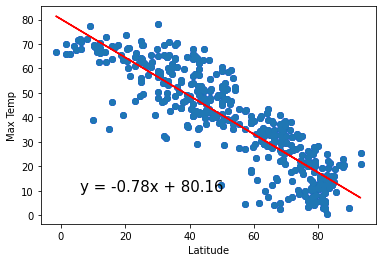

In [19]:
x_values = northern_hemisphere["Max Temp"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5564549651968143


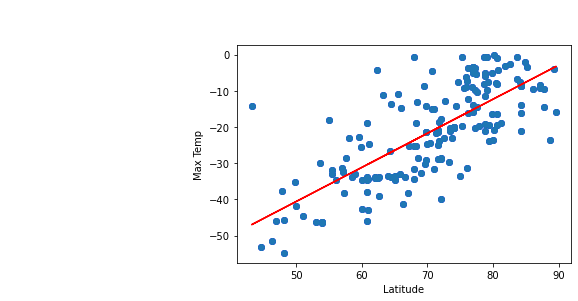

In [20]:
x_values = southern_hemisphere["Max Temp"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.06686715051862946


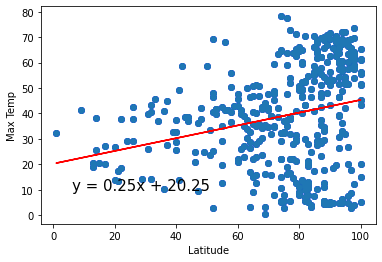

In [21]:
x_values = northern_hemisphere["Humidity"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.010840339385291465


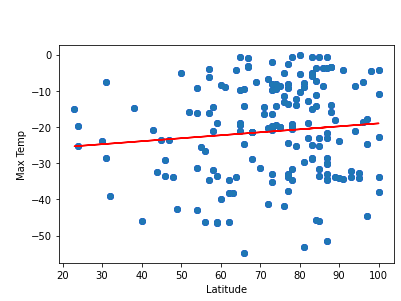

In [22]:
x_values = southern_hemisphere["Humidity"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04757619214344211


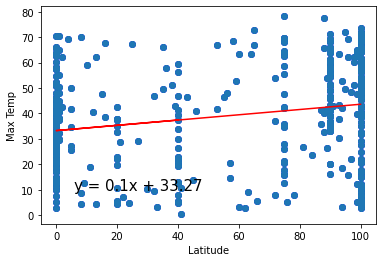

In [23]:
x_values = northern_hemisphere["Cloudiness"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0007495918140464744


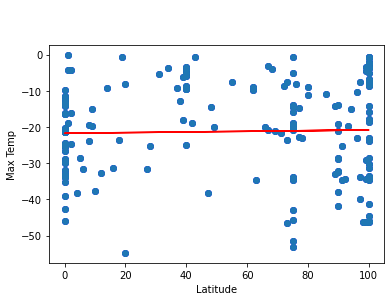

In [24]:
x_values = southern_hemisphere["Cloudiness"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03392956745215491


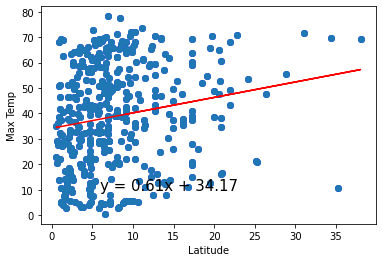

In [25]:
x_values = northern_hemisphere["Wind Speed"]
y_values = northern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08088032650134507


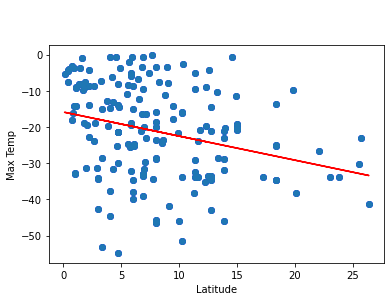

In [26]:
x_values = southern_hemisphere["Wind Speed"]
y_values = southern_hemisphere["Lat"]

plt.scatter(x_values,y_values,marker = "o", color='b')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15)
print(f"The r-squared is: {rvalue**2}")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()